In [2]:
# Import libraries
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('C:/Users/ASUS/Desktop/Project2/store_data.csv')

In [4]:
dis_items = df[df['Discount'] == 0]
dis_list = list(dis_items["Quantity"])
nondis_items = df[df['Discount'] != 0]
nondis_list = list(nondis_items["Quantity"])

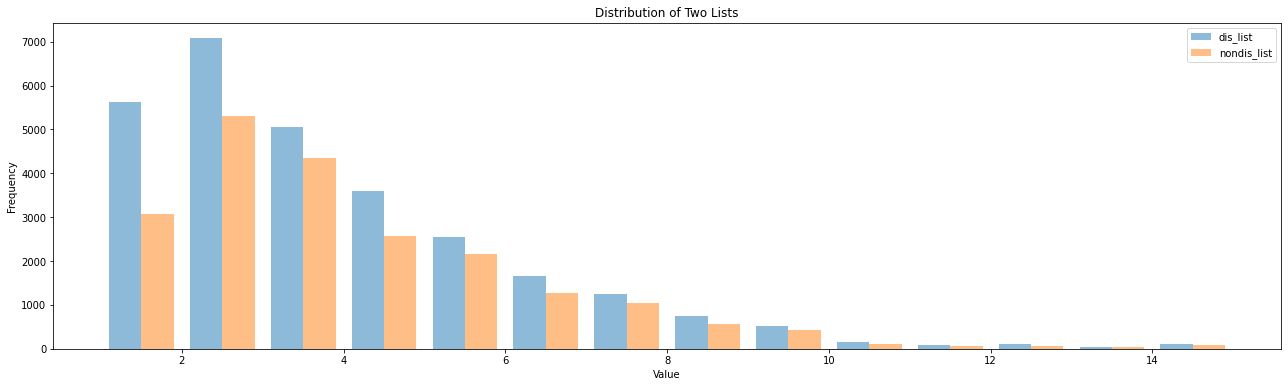

In [5]:
fig, ax = plt.subplots(figsize=(22, 6))
plt.hist([dis_list, nondis_list], bins=range(1, 16), alpha=0.5, label=['dis_list', 'nondis_list'])
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Distribution of Two Lists')
plt.legend(loc='upper right')

plt.show()

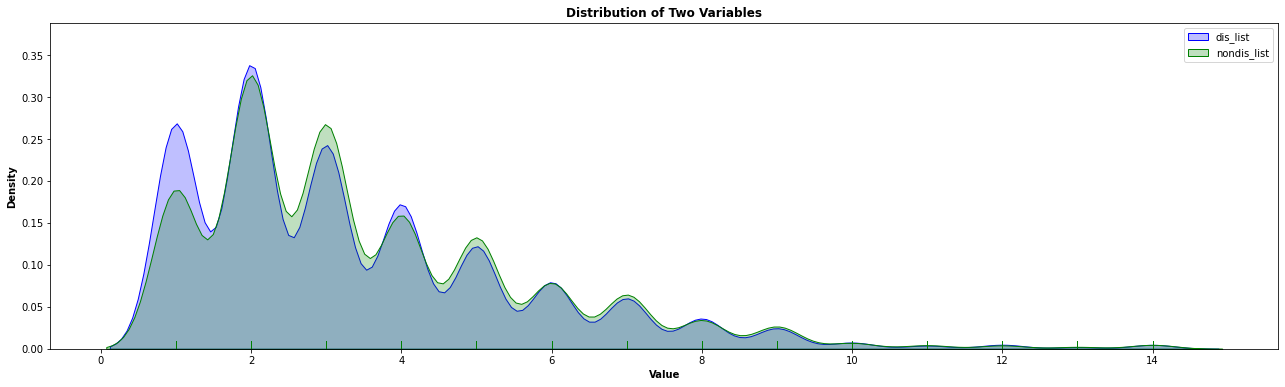

In [6]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(22, 6))
sns.kdeplot(x=dis_list, fill=True, color='blue',label='dis_list')
sns.rugplot(x=dis_list, color='blue')
sns.kdeplot(x=nondis_list, fill=True, color='green',label='nondis_list')
sns.rugplot(x=nondis_list, color='green')

# Add labels and title
plt.xlabel('Value', fontweight='bold')
plt.ylabel('Density', fontweight='bold')
plt.title('Distribution of Two Variables', fontweight='bold')
plt.legend()
# Show the plot
plt.show()

In [7]:
from scipy.stats import mannwhitneyu

# Perform the Mann-Whitney U test
stat, p = mannwhitneyu(dis_list, nondis_list)
# Print the test statistic and p-value
print('Mann-Whitney U statistic: ', stat)
print('p-value: ', p)

Mann-Whitney U statistic:  284348831.0
p-value:  4.208944088702824e-28


If the variables are not normally distributed, you can use the non-parametric Mann-Whitney U test to compare the means of two groups. The Mann-Whitney U test is a non-parametric equivalent of the two-sample t-test, and is used to compare the medians of two groups.

If the p-value is less than the significance level (usually 0.05), we can reject the null hypothesis and conclude that there is a statistically significant difference between the medians of the two groups. If the p-value is greater than the significance level, we fail to reject the null hypothesis and conclude that there is not a statistically significant difference between the medians of the two groups.

If the data are not normally distributed, it is generally more appropriate to compare the medians of the two groups rather than their means. This is because the median is a robust measure of central tendency that is less affected by extreme values or outliers than the mean. In contrast, the mean can be heavily influenced by outliers or skewness in the data.

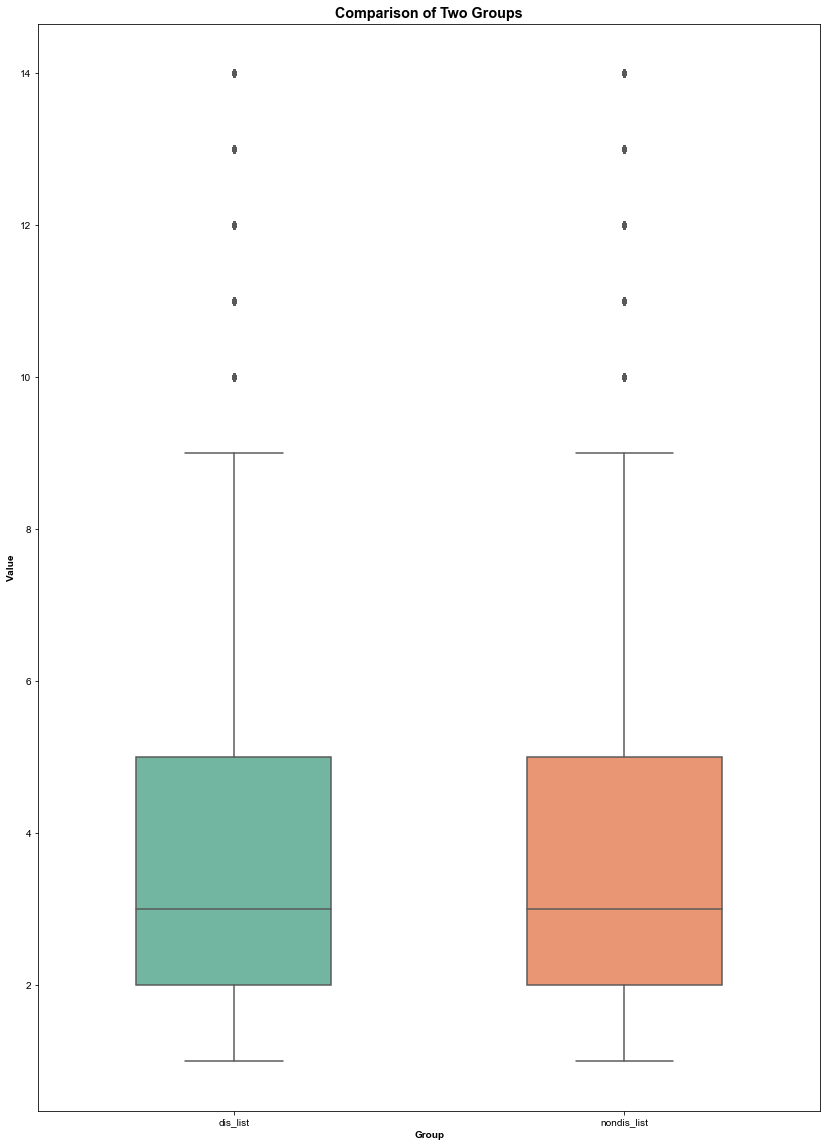

In [8]:
import seaborn as sns
data = {'Group': ['dis_list'] * len(dis_list) + ['nondis_list'] * len(nondis_list), 
        'Value': dis_list + nondis_list}
fig, ax = plt.subplots(figsize=(14, 20))
# Create a box plot of the data
sns.set(style='ticks', font_scale=1.2)
sns.boxplot(x='Group', y='Value', data=data, palette='Set2', width=0.5)

# Add labels and title
plt.xlabel('Group', fontweight='bold')
plt.ylabel('Value', fontweight='bold')
plt.title('Comparison of Two Groups', fontweight='bold')

# Show the plot
plt.show()

In [11]:
median_nondis = np.median(nondis_list)
mean_nondis = np.mean(nondis_list)
print('median of non discounted items : ' , median_nondis) 
print('mean of non discounted items : ' , mean_nondis)

median of non discounted items :  3.0
mean of non discounted items :  3.5678889520560926


In [15]:
median_dis = np.median(dis_list)
mean_dis = np.mean(dis_list)
print('median of discounted items : ' , median_dis) 
print('mean of discounted items : ' , mean_dis)

median of discounted items :  3.0
mean of discounted items :  3.399026678804005


In [19]:
dis_df = pd.DataFrame(dis_list, columns=['quantity'])
nondis_df = pd.DataFrame(nondis_list, columns=['quantity'])
dis_df.to_csv('discounted_table.csv', index=False)
nondis_df.to_csv('nondiscounted_table.csv', index=False)